Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

Define layer name

In [3]:
folder_name = 'label_10'

Label 01

In [4]:
cols = list(pd.read_csv(f"{folder_name}/train.csv", nrows=1))
train_data = pd.read_csv(f"{folder_name}/train.csv",usecols =[i for i in cols if i not in ["label_4", "label_3", "label_2"]])
train_data.shape

(28520, 769)

Handling missing values

In [5]:
train_data = train_data.dropna()
print(train_data.shape)
train_data.head()

(28520, 769)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1
0,-0.027083,0.072947,-0.093659,0.053418,-0.085516,-0.102610,-0.021217,0.016162,-0.184269,0.110335,...,0.067435,-0.019936,-0.273023,-0.183643,0.091299,-0.037097,0.042607,-0.034361,-0.013748,45
1,0.070195,0.228641,-0.132860,-0.077761,-0.054993,-0.210365,0.127747,-0.132385,-0.161366,0.172764,...,0.020278,-0.022319,-0.295371,-0.123668,0.029626,-0.027345,0.055223,-0.179725,0.136841,45
2,0.164312,0.052808,-0.058510,0.104724,-0.025886,-0.101427,-0.047177,0.091298,-0.094569,0.088062,...,-0.010740,0.064840,-0.310890,0.075410,0.070125,0.043022,0.012972,-0.028920,0.096725,45
3,0.029730,0.113737,0.061113,-0.099329,-0.111600,-0.245942,0.086520,0.071996,0.028319,0.207910,...,-0.005819,-0.040344,-0.170511,-0.062511,-0.226912,-0.046011,0.011282,-0.095167,0.039979,45
4,0.031364,0.142409,-0.160743,-0.076594,-0.062412,-0.264732,0.079197,0.026060,-0.217023,0.084656,...,0.008716,0.021783,-0.232735,-0.193882,0.107297,-0.042355,0.046763,-0.192469,0.006463,45


numbers of missing values neglegible 

Import test data set

In [6]:
cols = list(pd.read_csv(f"{folder_name}/valid.csv", nrows=1))
valid_data = pd.read_csv(f"{folder_name}/valid.csv",usecols =[i for i in cols if i not in ["label_4", "label_3", "label_2"]])
valid_data.shape

(750, 769)

Handling missing values

In [7]:
valid_data = valid_data.dropna()
valid_data.shape

(750, 769)

In [8]:
#features
X_train = train_data.iloc[:,:-1]
Y_train = train_data.iloc[:,-1]
X_valid = valid_data.iloc[:,:-1]
Y_valid = valid_data.iloc[:,-1]

Standarization

In [9]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

X_train_scaler = robust_scaler.transform(X_train)
X_valid_scaler = robust_scaler.transform(X_valid)

Dimensionality reduction

In [10]:
pca = PCA(0.98)
pca = pca.fit(X_train_scaler)

X_train_pca = pca.transform(X_train_scaler)
X_valid_pca = pca.transform(X_valid_scaler)
X_train_pca.shape

(28520, 424)

oversampling and undersampling

<Axes: title={'center': 'Count of Label_2'}>

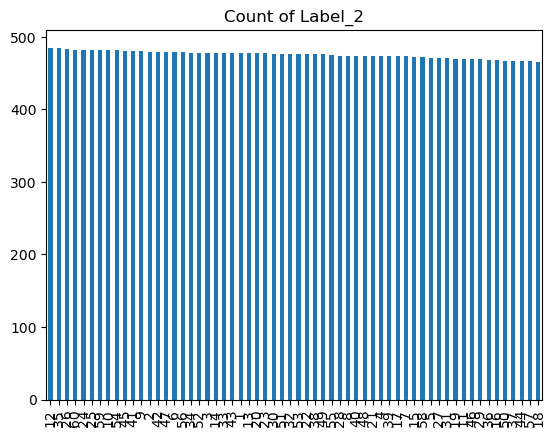

In [16]:
train_data['label_1'].value_counts().plot(kind='bar',title='Count of Label_2')

(28688, 424)


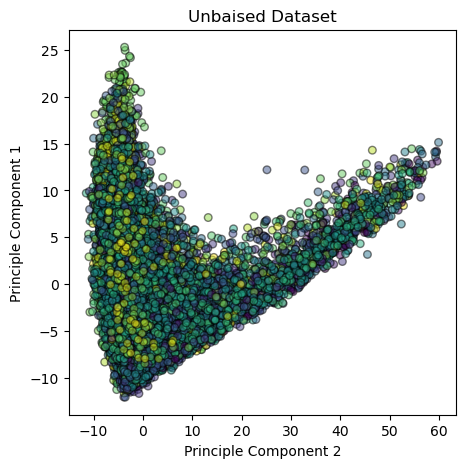

In [17]:
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X_train_smt, Y_train_smt = smotetomek.fit_resample(X_train_pca, Y_train)
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_smt, Y_train_smt, ax, title='Unbaised Dataset')
print(X_train_smt.shape)

cross validation

In [11]:
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
svc_init = SVC()
svc_scores = cross_val_score(svc_init, X_train_scaler, Y_train, cv=2) 
print("Cross-Validation Scores for SVC:", svc_scores)
print("Mean Accuracy:", svc_scores.mean())

from sklearn.ensemble import RandomForestClassifier
rf_init = RandomForestClassifier()
rf_scores = cross_val_score(rf_init, X_train_scaler, Y_train, cv=2)
print("Cross-Validation Scores for Random Forest:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

from sklearn.neighbors import KNeighborsClassifier
knn_init = KNeighborsClassifier()
knn_scores = cross_val_score(knn_init, X_train_scaler, Y_train, cv=2)
print("Cross-Validation Scores for KNN:", knn_scores)
print("Mean Accuracy:", knn_scores.mean())

Cross-Validation Scores for SVC: [0.92959327 0.93218794]
Mean Accuracy: 0.930890603085554
Cross-Validation Scores for Random Forest: [0.83962132 0.83576438]
Mean Accuracy: 0.8376928471248246
Cross-Validation Scores for KNN: [0.86746143 0.86493689]
Mean Accuracy: 0.8661991584852735


Using SVC

In [18]:
from sklearn.svm import SVC

In [15]:
svc_init = SVC()
svc_init.fit(X_train_scaler,Y_train)
svc_predicted = svc_init.predict(X_valid_scaler)
accuracy_score(Y_valid,svc_predicted)

0.952

After feature engineering

In [16]:
svc = SVC()
svc.fit(X_train_smt, Y_train_smt)
svc_predicted = svc.predict(X_valid_pca)
accuracy_score(Y_valid,svc_predicted)

0.944

Hyper Parameter tuning without dimentionality reduction

In [17]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_smt, Y_train_smt)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 4.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 4.2min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 4.2min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.017 total time= 4.0min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.034 total time= 4.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 3.4min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 3.5min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 3.6min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.017 total time= 3.6min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.018 total time= 3.4min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.411 total time= 3.3min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.026 total time= 3.8min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.022 total time= 3.8min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.026 total time= 3.8min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.046 total time= 3.8min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.039 total time= 3.1min
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.053 total time= 3.1min
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.041 total time= 3.2min
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.059 total time= 3.3min
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.113 total time= 3.6min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.915 total time= 5.3min
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.915 total time= 4.0min
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.917 total time= 5.3min
[CV 4/5] END ....C=1000, gam

In [18]:
grid_predictions = grid.predict(X_valid_pca)
  
# print classification report
accuracy_score(Y_valid, grid_predictions)

0.9613333333333334

In [19]:
cols = list(pd.read_csv(f"{folder_name}/test.csv", nrows=1))
test_data = pd.read_csv(f"{folder_name}/test.csv",usecols =[i for i in cols if i not in ["label_4", "label_3", "label_2"]])
test_data.shape

(744, 769)

In [22]:
#features
X_test = test_data.iloc[:,1:]
X_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,-0.063023,0.085030,-0.057909,0.024293,0.028695,-0.113796,0.028477,-0.006041,-0.132434,0.088144,...,-0.160050,0.078897,0.120168,-0.160152,-0.200884,0.046231,-0.115850,0.182974,0.047106,-0.118783
1,-0.036403,0.115930,-0.066521,0.045771,-0.027250,-0.164679,0.023611,0.056512,-0.171498,-0.021133,...,-0.137038,0.042576,0.006788,-0.207013,-0.205184,-0.053462,-0.003775,-0.035003,-0.041118,-0.079211
2,0.030672,0.045321,-0.163811,0.142376,-0.125894,-0.083943,-0.039693,-0.004867,-0.127951,0.111345,...,0.090191,0.038063,0.070423,-0.253409,-0.072147,0.016236,-0.144047,-0.122405,-0.063079,-0.188233
3,-0.000984,0.080593,-0.067086,0.005251,-0.141851,-0.125211,-0.016161,0.106323,-0.203491,-0.027378,...,-0.107041,0.028166,-0.073713,-0.073180,-0.109380,-0.027901,-0.006863,0.016840,-0.171139,0.086868
4,0.059806,0.088846,-0.058021,0.133098,-0.083380,-0.026724,-0.033793,-0.004055,-0.057890,-0.011114,...,0.047907,0.026333,0.012204,-0.245772,-0.044506,0.058273,-0.005203,-0.104552,0.002035,-0.091528


In [23]:
X_test_scaler = robust_scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

In [27]:
grid_predictions = grid.predict(X_test_pca)
grid_predictions

array([26, 18, 16,  7, 58, 46,  7, 22, 29, 26, 33,  6, 54, 51, 29, 48, 23,
        2, 43, 42, 11, 35, 39, 36, 44, 48, 28, 55,  2, 51, 55, 46,  1, 56,
       30, 22, 50,  6, 40, 18, 19, 47,  6, 46, 59, 25, 31, 38,  5, 32, 25,
       56, 39, 37, 32, 29, 46, 52, 28, 34, 16, 47, 55, 24, 23, 18, 20,  6,
       36, 38, 22, 28, 44, 46, 55, 59, 49, 55, 57, 12, 52, 38, 29,  4, 31,
       49, 14, 19, 12, 39, 36, 43, 34, 32, 54, 46, 27,  5,  7, 42, 19, 26,
       31, 36, 53, 10, 12, 33, 38,  2, 57, 37, 17, 50, 46, 46, 17, 34, 32,
       40, 19, 40,  8, 22, 38, 15, 39,  9, 52, 37, 28, 13, 10, 55, 28, 25,
       42, 57, 16, 27, 23,  2, 51, 27, 32, 46, 16, 53, 11, 46, 42, 37, 47,
       50,  3, 41, 19, 20, 15,  8,  3, 18,  5, 28, 46, 49, 16, 40, 17, 20,
       53, 57, 27, 16, 11, 35, 34, 52, 41, 55,  7, 18, 21, 19, 37, 55, 29,
       28, 23, 35, 46, 52, 30, 27, 13,  7, 28, 14,  3, 36, 17, 60, 18,  3,
       22,  9, 46, 25, 17, 26, 19, 36, 36, 21,  1, 44, 39, 47, 38,  6, 50,
       39, 23, 37, 48, 22

In [30]:
size = grid_predictions.size
index = []
for i in range(size):
    index.append(i+1)
data = {
    'ID': index,
    'label_1': grid_predictions
}
df = pd.DataFrame(data)
df.to_csv('10-1.csv', index=False)

Explainability

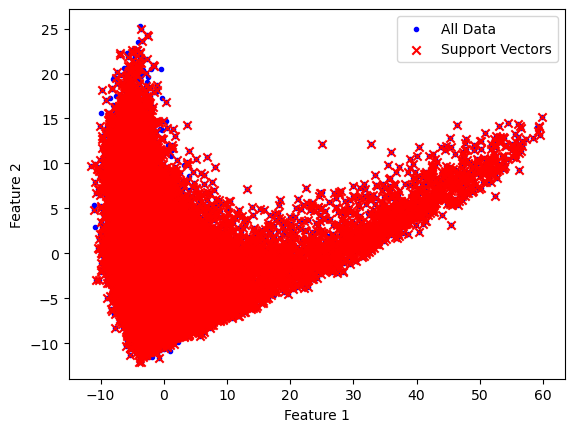

In [19]:
svc = SVC(C=10, gamma=0.001)
svc.fit(X_train_smt, Y_train_smt)
svc_predicted = svc.predict(X_valid_pca)
support_vectors = svc.support_vectors_
plt.scatter(X_train_smt[:, 0], X_train_smt[:, 1], c='b', marker='.', label='All Data')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='r', marker='x', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_valid, svc_predicted)
print(confusion_matrix)

[[12  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]


In [21]:
from sklearn.metrics import  classification_report
class_report = classification_report(Y_valid, svc_predicted)
print(class_report)

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00         9
           3       1.00      0.92      0.96        12
           4       0.94      1.00      0.97        16
           5       1.00      0.94      0.97        18
           6       1.00      0.89      0.94         9
           7       0.89      0.94      0.91        17
           8       1.00      0.79      0.88        14
           9       1.00      0.91      0.95        11
          10       1.00      1.00      1.00         8
          11       1.00      0.95      0.97        19
          12       0.88      1.00      0.93         7
          13       1.00      0.91      0.95        11
          14       1.00      0.93      0.97        15
          15       1.00      0.88      0.94        17
          16       1.00      1.00      1.00        14
          17       1.00      0.93      0.96        14
          18       1.00    

In [22]:
np.corrcoef(X_train_smt,rowvar=False)

array([[ 1.00000000e+00, -2.68465187e-02,  5.17669439e-03, ...,
        -1.62154280e-04,  2.31618584e-03, -2.90156286e-03],
       [-2.68465187e-02,  1.00000000e+00,  1.82238997e-03, ...,
         2.32976178e-03,  9.94413443e-04,  9.62346829e-04],
       [ 5.17669439e-03,  1.82238997e-03,  1.00000000e+00, ...,
        -8.01850307e-04,  6.43983181e-04, -1.45166305e-03],
       ...,
       [-1.62154280e-04,  2.32976178e-03, -8.01850307e-04, ...,
         1.00000000e+00, -3.02792515e-03,  2.51061735e-03],
       [ 2.31618584e-03,  9.94413443e-04,  6.43983181e-04, ...,
        -3.02792515e-03,  1.00000000e+00, -6.06378963e-04],
       [-2.90156286e-03,  9.62346829e-04, -1.45166305e-03, ...,
         2.51061735e-03, -6.06378963e-04,  1.00000000e+00]])